<a href="https://colab.research.google.com/github/TuanAnh0304/DoAnGiuaKi_python/blob/main/Incidence_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ma trận liên thuộc (Incidence Matrix):
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]]


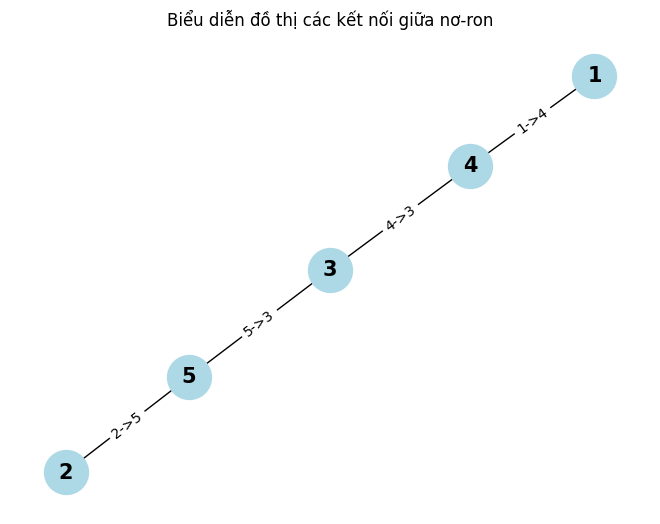

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def create_incidence_matrix(layers_connections):
    """
    Tạo ma trận liên thuộc từ các kết nối giữa các lớp.S

    :param layers_connections: Danh sách các kết nối giữa các lớp,
                               mỗi kết nối là tuple (neuron từ, neuron đến)
    :return: Ma trận liên thuộc (incidence matrix)
    """
    all_neurons = set([neuron for connection in layers_connections for neuron in connection])
    num_neurons = len(all_neurons)
    num_edges = len(layers_connections)

    # Tạo ma trận liên thuộc (num_neurons x num_edges)
    incidence_matrix = np.zeros((num_neurons, num_edges), dtype=int)

    # Duyệt qua mỗi kết nối và cập nhật ma trận liên thuộc
    for edge_index, (neuron_from, neuron_to) in enumerate(layers_connections):
        incidence_matrix[neuron_from - 1, edge_index] = 1  # Xuất phát từ neuron_from
        incidence_matrix[neuron_to - 1, edge_index] = 1    # Kết thúc ở neuron_to

    return incidence_matrix

# Danh sách các kết nối giữa lớp 1 và lớp 2
layers_connections = [(1, 4), (2, 5), (3, 4), (3, 5)]

# Tạo ma trận liên thuộc
incidence_matrix = create_incidence_matrix(layers_connections)

# In ma trận liên thuộc
print("Ma trận liên thuộc (Incidence Matrix):")
print(incidence_matrix)

# Tạo đồ thị và thêm các cạnh từ danh sách layers_connections
G = nx.Graph()

# Thêm các kết nối giữa các nơ-ron vào đồ thị
G.add_edges_from(layers_connections)

# Vẽ đồ thị
pos = nx.spring_layout(G)  # Định vị các nốt đồ thị
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=15, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{i}->{j}' for i, j in G.edges()})

# Hiển thị đồ thị
plt.title("Biểu diễn đồ thị các kết nối giữa nơ-ron")
plt.show()
